### Acute Inflammations Data Set
https://archive.ics.uci.edu/ml/datasets/Acute+Inflammations

In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv("acute-inflammations-diagnosis.csv",header=None)
for label, content in df.iteritems():
    if content.dtype == "object":
        df[label] = content.map(dict(yes=1, no=0))
df1 = df.apply(pd.to_numeric, errors='coerce')
continuous_index =  df1.dtypes[df1.dtypes == "float64"].index.values.tolist()

In [3]:
df.dtypes

0    float64
1      int64
2      int64
3      int64
4      int64
5      int64
6      int64
7      int64
dtype: object

In [14]:
continuous_index

[0]

In [15]:
df1

,0,1,2,3,4,5,6,7
0,35.5,0,1,0,0,0,0,0
1,35.9,0,0,1,1,1,1,0
2,35.9,0,1,0,0,0,0,0
3,36.0,0,0,1,1,1,1,0
4,36.0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
115,41.4,0,1,1,0,1,0,1
116,41.5,0,0,0,0,0,0,0
117,41.5,1,1,0,1,0,0,1
118,41.5,0,1,1,0,1,0,1


<AxesSubplot:>

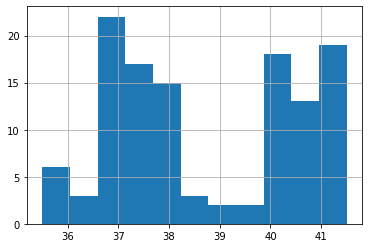

In [17]:
df1.iloc[:,0].hist(bins='sqrt')

In [5]:
pd.qcut(df1.iloc[:,0],10,labels=False)

0      2.0
1      3.0
2      3.0
3      9.0
4      3.0
      ... 
126    2.0
127    8.0
128    7.0
129    4.0
130    4.0
Name: 0, Length: 131, dtype: float64

In [32]:
'''df2 = pd.DataFrame()
for i in df1.dtypes.index.values.tolist():
    if(i in continuous_index):
        series = pd.qcut(df1.iloc[:,i],55,labels=False, duplicates="drop")
        df2.insert(loc=i,column=i,value=series)
    else:
        series = df1.iloc[:,i]
        df2.insert(loc=i,column=i,value=series)'''

In [3]:
df2 = pd.DataFrame()
for i in df1.dtypes.index.values.tolist():
    if(i in continuous_index):
        npa = df1.iloc[:,i].to_numpy()
        npa1 = npa[~np.isnan(npa)]
        bins = np.histogram_bin_edges(npa1)
        npa2 = np.digitize(npa, bins)
        df2.insert(loc=i,column=i,value=npa2)
    else:
        series = df1.iloc[:,i]
        df2.insert(loc=i,column=i,value=series)

In [5]:
df2

,0,1,2,3,4,5,6,7
0,1,0,1,0,0,0,0,0
1,1,0,0,1,1,1,1,0
2,1,0,1,0,0,0,0,0
3,1,0,0,1,1,1,1,0
4,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
115,10,0,1,1,0,1,0,1
116,11,0,0,0,0,0,0,0
117,11,1,1,0,1,0,0,1
118,11,0,1,1,0,1,0,1


In [20]:
'''for i in range(0, len(df2.columns)):
    cats = df2[i].value_counts()
    cats = cats.index.to_numpy()
    cats_mapping = {}
    for x in range(0,len(cats)):
        cats_mapping[cats[x]] = x
    cats_mapping
    df2[i]= df2[i].map(cats_mapping)'''

'for i in range(0, len(df2.columns)):\n    cats = df2[i].value_counts()\n    cats = cats.index.to_numpy()\n    cats_mapping = {}\n    for x in range(0,len(cats)):\n        cats_mapping[cats[x]] = x\n    cats_mapping\n    df2[i]= df2[i].map(cats_mapping)'

In [6]:
df2[0].value_counts()

4     21
3     21
10    18
9     16
8     13
5      9
2      7
1      6
11     4
6      4
7      1
Name: 0, dtype: int64

In [23]:
'''cats_mapping = {}
for i in range(0,len(cats)):
    cats_mapping[cats[i]] = i
cats_mapping'''

'cats_mapping = {}\nfor i in range(0,len(cats)):\n    cats_mapping[cats[i]] = i\ncats_mapping'

<AxesSubplot:>

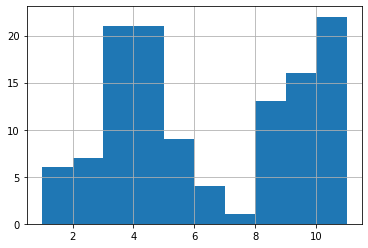

In [7]:
df2.iloc[:,0].hist()

In [4]:
#Y1 = d2 decision: Nephritis of renal pelvis origin { yes, no }
header_names=['X1','X2','X3','X4','X5','X6','X7','Y1']
#header_names=['0','1','2','3','4','5','6','7','8','9']

oversample = SMOTE()
cols = df2.columns
X = df2.iloc[:,0:len(cols)-1]
Y = df2.iloc[:,len(cols)-1]
print("Number of rows before SMOTE: " + str(len(Y)))
X, Y = oversample.fit_resample(X, Y)
print("Number of rows after SMOTE: " + str(len(Y)))
df3 = pd.DataFrame(X)
df3['Y1'] = pd.Series(Y) 

df2.to_csv("acute-inflammations-diagnosis-discretized.csv", index=False, header=header_names)
df3.to_csv("acute-inflammations-diagnosis-discretized-oversampled.csv", index=False, header=header_names)

Number of rows before SMOTE: 120
Number of rows after SMOTE: 140
